#**INTRODUCTION**

TASK AS A PART OF **THE SPARKS FOUNDATION(TSF)** UNDER GRADUATE INTERNSHIP ROTATIONAL PROGRAM(GRIP) FEBRUARY 2023.

**TASK#1 PREDICT THE PERCENTAGE OF A STUDENT BASED ON NO. OF STUDY HOURS.**

**Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

**DATASET:**http://bit.ly/w-data

#IMPORTING LIBRARIES and LOADING THE DATA

In [91]:
#IMPORTING ALL THE LIBRARIES REQUIRED IN THIS NOTEBOOK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#IMPORTING ALL THE METRICS REQUIRED
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [92]:
#READING THE DATA FROM REMOTE LINK
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("DATA IMPORTED SUCCESSFULLY")

DATA IMPORTED SUCCESSFULLY


In [93]:
#CHECKING FIRST 10 ROWS OF DATASET
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [94]:
#CHECKING LAST 10 ROWS OF DATASET
s_data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [95]:
#CHECKING NO. OF ROWS AND COLUMNS IN THE DATASET
s_data.shape

(25, 2)

25 rows and 2 columns are present in the dataset

In [96]:
#CHECKING THE INFORMATION OF THE DATASET
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [97]:
#DESCRIBING THE DATA
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [98]:
#CHECKING FOR NULL VALUES
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values present in the dataset

#DATA VISUALIZATION

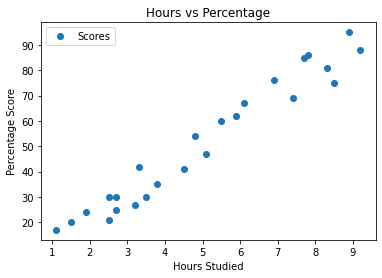

In [99]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there might a positive linear relation between the number of hours studied and percentage of score.**
**Let's confirm by plotting a regression line.**

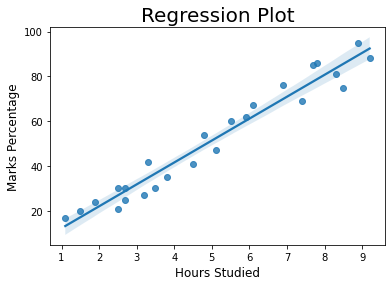

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [100]:
#plotting a regression line
sns.regplot(x= s_data['Hours'], y= s_data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(s_data.corr())

**There is a positive relation between no. of hours studied and percentage scores.**

#**PREPARING THE DATA**

In [101]:
#DIVIDING THE DATA into dependent and independent variables
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0) 
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (20, 1)
X_test shape: (5, 1)
y_train shape: (20,)
y_test shape: (5,)


**TRAINING THE DATA**

In [103]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [104]:
#checking the regression coefficient
regressor.coef_

array([9.91065648])

In [105]:
#Checking the regression intercept
regressor.intercept_

2.018160041434662

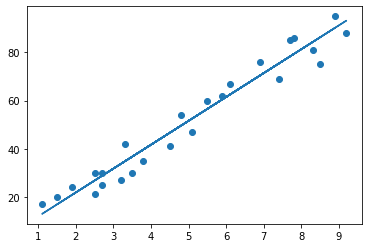

In [106]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#**MAKING PREDICTIONS**

In [107]:
print(X_test) # Testing data - In Hours
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [108]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#**CHECKING THE ACCURACY OF THE MODEL**

In [109]:
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',r2_score(y_test,y_pred))

Mean absolute error: 4.183859899002982
Mean Squared error: 21.598769307217456
Root Mean Squared error: 0.9454906892105354


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

**Root Mean Squared Error value shows that 94% data fits in the model.**


#**Question: What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [110]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


**So the predicted score would be '93.893' of a student if he/she studies for 9.25 hours per day.**